In [ ]:
# Instalación de bibliotecas
!pip install tensorflow pandas matplotlib opencv-python scikit-learn


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/root/.kaggle"
!mkdir -p /root/.kaggle
!mv kaggle.json /root/.kaggle/

mv: cannot stat 'kaggle.json': No such file or directory


In [ ]:
#La importación de los datasets
!kaggle datasets download -d msambare/fer2013
!kaggle datasets download -d tapakah68/facial-emotion-recognition
!kaggle datasets download -d sanidhyak/human-face-emotions
!kaggle datasets download -d dilkushsingh/facial-emotion-dataset


Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
fer2013.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset URL: https://www.kaggle.com/datasets/tapakah68/facial-emotion-recognition
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
facial-emotion-recognition.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset URL: https://www.kaggle.com/datasets/sanidhyak/human-face-emotions
License(s): other
human-face-emotions.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset URL: https://www.kaggle.com/datasets/dilkushsingh/facial-emotion-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
facial-emotion-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#Descomprimimos los archivos
import zipfile
import os

download_dir = '/content/'

zip_files = [f for f in os.listdir(download_dir) if f.endswith('.zip')]

for zip_file in zip_files:
    zip_path = os.path.join(download_dir, zip_file)
    extract_dir = os.path.join(download_dir, zip_file.replace('.zip', ''))
    os.makedirs(extract_dir, exist_ok=True)

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)  # Extraer todos los archivos
    print(f"Descomprimido: {zip_file} en {extract_dir}")


Descomprimido: human-face-emotions.zip en /content/human-face-emotions
Descomprimido: fer2013.zip en /content/fer2013
Descomprimido: facial-emotion-dataset.zip en /content/facial-emotion-dataset
Descomprimido: facial-emotion-recognition.zip en /content/facial-emotion-recognition


In [ ]:
# Mapeo de las etiquetas a las nuevas categorías numeradas
label_mapping = {
    'angry': 0,       # angry -> 0
    'neutral': 1,      # neutral -> 1
    'disgust': 2,      # disgust -> 2
    'fear': 3,         # fear -> 3
    'happy': 4,        # happy -> 4
    'sad': 5,      # sad -> 5
    'surprise': 6,     # surprise -> 6
}

In [ ]:
#Función para cargar imágenes
import os
import pandas as pd

# Función para cargar imágenes y etiquetarlas
def load_images_and_labels(dataset_path, label_mapping):
    image_paths = []
    labels = []

    # Recorrer las carpetas dentro del dataset
    for class_folder in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_folder)

        # Asegurarse de que es una carpeta (no un archivo)
        if os.path.isdir(class_path):
            # Normalizar el nombre de la carpeta a minúsculas
            normalized_class_folder = class_folder.lower()

            # Si la carpeta pertenece a alguna de las categorías con nombre variable
            if normalized_class_folder in ['angry', 'anger']:
                mapped_label = label_mapping['angry']
            elif normalized_class_folder in ['sad', 'sadness']:
                mapped_label = label_mapping['sad']
            elif normalized_class_folder in label_mapping:
                mapped_label = label_mapping[normalized_class_folder]
            else:
                print(f"Etiqueta no mapeada: {class_folder}")
                continue  # Si no se encuentra en el mapeo, se omite

            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                image_paths.append(img_path)
                labels.append(mapped_label)

    # Crear un DataFrame con las rutas de imágenes y las etiquetas mapeadas
    df = pd.DataFrame({'image_path': image_paths, 'label': labels})
    return df


In [ ]:
#Esto se hace para el dataset que no tiene la misma estructura que los otros
#Dataset facial-emotion-recognition
# Diccionario de correcciones para los nombres de las imágenes
corrections = {
    'surprised': 'surprise',  # 'surprised' -> 'surprise'
    'anger': 'angry'          # 'anger' -> 'angry'
}

# Función para cargar imágenes y etiquetarlas
def load_images_and_labels_2(dataset_path, label_mapping, corrections):
    image_paths = []
    labels = []

    # Recorrer las carpetas dentro del dataset (cada carpeta es un sujeto)
    for subject_folder in os.listdir(dataset_path):
        subject_path = os.path.join(dataset_path, subject_folder)

        # Asegurarse de que es una carpeta (no un archivo)
        if os.path.isdir(subject_path):
            for img_name in os.listdir(subject_path):
                img_path = os.path.join(subject_path, img_name)

                # Usar el nombre de la imagen sin la extensión y convertirlo a minúsculas
                img_name_lower = img_name.lower().split('.')[0]

                # Corregir el nombre si tiene alguna de las variaciones que deben ser mapeadas
                if img_name_lower in corrections:
                    img_name_lower = corrections[img_name_lower]

                # Buscar el mapeo para la etiqueta
                mapped_label = label_mapping.get(img_name_lower, None)
                if mapped_label is None:
                    print(f"Etiqueta no mapeada: {img_name_lower} en la carpeta {subject_folder}")
                    continue  # Si la etiqueta no está mapeada, la imagen se omite

                image_paths.append(img_path)
                labels.append(mapped_label)

    # Crear un DataFrame con las rutas de imágenes y las etiquetas mapeadas
    df = pd.DataFrame({'image_path': image_paths, 'label': labels})
    return df



In [15]:
# Creamos dataframes con las etiquetas y rutas de cada dataset y leugo los unimos
dataset_paths = [
    '/content/fer2013/test',
    '/content/fer2013/train',
    '/content/human-face-emotions/data',
    '/content/facial-emotion-dataset/test_dir',
    '/content/facial-emotion-dataset/train_dir',
    '/content/facial-emotion-recognition/images'
]

dfs = []
for path in dataset_paths:
    if path == '/content/facial-emotion-recognition/images':
        df = load_images_and_labels_2(path, label_mapping, corrections)
    else:
        df = load_images_and_labels(path, label_mapping)
    dfs.append(df)

# Unir todos los DataFrames
df_combined = pd.concat(dfs, ignore_index=True)

# Verificar la distribución de las etiquetas
print(df_combined.head())
print(df_combined['label'].value_counts())


Etiqueta no mapeada: contempt en la carpeta 0
Etiqueta no mapeada: contempt en la carpeta 6
Etiqueta no mapeada: contempt en la carpeta 17
Etiqueta no mapeada: contempt en la carpeta 4
Etiqueta no mapeada: contempt en la carpeta 14
Etiqueta no mapeada: contempt en la carpeta 7
Etiqueta no mapeada: contempt en la carpeta 1
Etiqueta no mapeada: contempt en la carpeta 18
Etiqueta no mapeada: contempt en la carpeta 13
Etiqueta no mapeada: contempt en la carpeta 2
Etiqueta no mapeada: contempt en la carpeta 16
Etiqueta no mapeada: contempt en la carpeta 9
Etiqueta no mapeada: contempt en la carpeta 3
Etiqueta no mapeada: contempt en la carpeta 8
Etiqueta no mapeada: contempt en la carpeta 5
Etiqueta no mapeada: contempt en la carpeta 12
Etiqueta no mapeada: contempt en la carpeta 15
Etiqueta no mapeada: contempt en la carpeta 11
Etiqueta no mapeada: contempt en la carpeta 10
                                          image_path  label
0  /content/fer2013/test/angry/PrivateTest_375306...     

In [16]:
# Verificar si las rutas de las imágenes son correctas
for index, row in df_combined.iterrows():
    if not os.path.exists(row['image_path']):
        print(f"¡Ruta no válida! {row['image_path']}")


In [17]:
from imgaug import augmenters as iaa
import numpy as np
import cv2
import os

def load_and_preprocess_images(df, img_size=(48, 48), augment=False):
    images = []
    labels = []

    # Configurar augmenters
    aug = iaa.Sequential([
        iaa.Affine(rotate=(-15, 15)),
        iaa.Fliplr(0.5),
        iaa.Multiply((0.8, 1.2)),
    ]) if augment else None

    for _, row in df.iterrows():
        if not os.path.exists(row['image_path']):
            print(f"Imagen no encontrada: {row['image_path']}")
            continue

        # Leer la imagen
        img = cv2.imread(row['image_path'])
        if img is None:
            print(f"Error al cargar la imagen: {row['image_path']}")
            continue

        # Convertir a escala de grises y redimensionar
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, img_size)

        # Asegurarse de que la imagen está en formato uint8
        img = img.astype(np.uint8)

        # Aplicar data augmentation (si está habilitado)
        if augment:
            img = aug.augment_image(img)

        # Normalizar la imagen (convertir a float después de augmentación)
        img = img / 255.0

        images.append(img)
        labels.append(row['label'])

    # Convertir a numpy arrays
    images = np.array(images).reshape(-1, img_size[0], img_size[1], 1)
    labels = np.array(labels)

    return images, labels

In [18]:
import os
import pandas as pd

# Filtra las imágenes de la clase 3
df_class_3 = df_combined[df_combined['label'] == 3]


In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np

# Configura las transformaciones
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [20]:
# Directorio de salida para las imágenes aumentadas
output_dir = "augmented_class_3"
os.makedirs(output_dir, exist_ok=True)

# Tamaño de las imágenes (ajustar si es diferente)
img_size = (48, 48)

# Número de imágenes aumentadas por ejemplo original
n_augmentations = 5

for index, row in df_class_3.iterrows():
    img_path = row['image_path']

    # Cargar la imagen original
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error al cargar la imagen: {img_path}")
        continue

    # Redimensionar si es necesario
    img = cv2.resize(img, img_size)

    # Expandir dimensión para adaptarse a ImageDataGenerator
    img = np.expand_dims(img, axis=-1)
    img = np.expand_dims(img, axis=0)  # (1, img_size[0], img_size[1], 1)

    # Generar imágenes aumentadas
    i = 0
    for batch in datagen.flow(img, batch_size=1, save_to_dir=output_dir,
                              save_prefix='class_3', save_format='png'):
        i += 1
        if i >= n_augmentations:
            break  # Limitar el número de augmentaciones por imagen

print(f"Datos aumentados guardados en: {output_dir}")


Datos aumentados guardados en: augmented_class_3


In [21]:
import glob

# Obtener los nuevos paths de las imágenes aumentadas
augmented_images = glob.glob(os.path.join(output_dir, "*.png"))

# Crear un nuevo dataframe para las imágenes aumentadas
df_augmented = pd.DataFrame({
    'image_path': augmented_images,
    'label': 3  # Etiqueta correspondiente
})

# Concatenar con el dataset original
df_new = pd.concat([df_combined, df_augmented], ignore_index=True)


In [22]:
# Ver las primeras filas del nuevo DataFrame
print(df_new.head())


# Verificar la distribución de las etiquetas
print(df_new['label'].value_counts())

                                          image_path  label
0  /content/fer2013/test/angry/PrivateTest_375306...      0
1  /content/fer2013/test/angry/PrivateTest_961236...      0
2  /content/fer2013/test/angry/PrivateTest_246068...      0
3  /content/fer2013/test/angry/PublicTest_6695086...      0
4  /content/fer2013/test/angry/PublicTest_9508356...      0
label
3    19629
4    17102
1    12512
5    12374
0     9909
6     7983
2     3457
Name: count, dtype: int64


In [23]:
from sklearn.model_selection import train_test_split

# Asumiendo que df_new tiene las rutas de las imágenes y las etiquetas
X = df_new['image_path'].values
y = df_new['label'].values

# Dividir los datos en entrenamiento y validación (80% entrenamiento, 20% validación)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y)

# Función para cargar y preprocesar las imágenes
def load_and_preprocess_images(X, y, img_size=(48, 48)):
    images = []
    labels = []

    for img_path, label in zip(X, y):
        # Cargar la imagen
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if img is None:
            print(f"Error al cargar la imagen: {img_path}")
            continue

        # Redimensionar y normalizar la imagen
        img = cv2.resize(img, img_size)
        img = img / 255.0  # Normalización

        images.append(img)
        labels.append(label)

    images = np.array(images)
    labels = np.array(labels)

    images = images.reshape(-1, img_size[0], img_size[1], 1)  # Para imágenes en escala de grises

    return images, labels

# Cargar y preprocesar los datos de entrenamiento y validación
X_train, y_train = load_and_preprocess_images(X_train, y_train)
X_val, y_val = load_and_preprocess_images(X_val, y_val)


Error al cargar la imagen: /content/human-face-emotions/data/Sad/crying-sad.gif


In [24]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense, Dropout

# Parámetros del modelo
input_shape = (48, 48, 1)  # Cambia según las dimensiones de tus imágenes
num_classes = 7

# Definición del modelo
model = Sequential([
    # Capa 1: Convolución + BatchNormalization + ReLU + MaxPooling
    Conv2D(32, (3, 3), padding='same', input_shape=input_shape),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Capa 2: Convolución + BatchNormalization + ReLU + MaxPooling
    Conv2D(64, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Capa 3: Convolución + BatchNormalization + ReLU + MaxPooling
    Conv2D(128, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Capa 4: Convolución adicional + BatchNormalization + ReLU + MaxPooling
    Conv2D(256, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Capa 5: Convolución adicional + BatchNormalization + ReLU + MaxPooling
    Conv2D(512, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Capa de aplanamiento
    Flatten(),

    # Capa completamente conectada
    Dense(512),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),  # Regularización

    # Capa de salida
    Dense(num_classes, activation='softmax')  # Softmax para clasificación
])

# Compilación del modelo
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Resumen del modelo
model.summary()

# Entrenamiento del modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,  # Número de épocas ajustable
    batch_size=32,
    verbose=1
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 6, 6, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 6, 6, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 3, 3, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 3, 3, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 3, 3, 512)           │              

 Total params: 1,840,263 (7.02 MB)

 Trainable params: 1,837,255 (7.01 MB)

 Non-trainable params: 3,008 (11.75 KB)

Epoch 1/10
2075/2075 ━━━━━━━━━━━━━━━━━━━━ 819s 392ms/step - accuracy: 0.4040 - loss: 1.6640 - val_accuracy: 0.5428 - val_loss: 1.2544
Epoch 2/10
2075/2075 ━━━━━━━━━━━━━━━━━━━━ 845s 384ms/step - accuracy: 0.6088 - loss: 1.0474 - val_accuracy: 0.4377 - val_loss: 1.9911
Epoch 3/10
2075/2075 ━━━━━━━━━━━━━━━━━━━━ 803s 385ms/step - accuracy: 0.6765 - loss: 0.8785 - val_accuracy: 0.6381 - val_loss: 1.0209
Epoch 4/10
2075/2075 ━━━━━━━━━━━━━━━━━━━━ 798s 383ms/step - accuracy: 0.7444 - loss: 0.7114 - val_accuracy: 0.6624 - val_loss: 1.0379
Epoch 5/10
2075/2075 ━━━━━━━━━━━━━━━━━━━━ 807s 386ms/step - accuracy: 0.8063 - loss: 0.5407 - val_accuracy: 0.6687 - val_loss: 0.9528
Epoch 6/10
2075/2075 ━━━━━━━━━━━━━━━━━━━━ 798s 384ms/step - accuracy: 0.8557 - loss: 0.4172 - val_accuracy: 0.7125 - val_loss: 1.0668
Epoch 7/10
2075/2075 ━━━━━━━━━━━━━━━━━━━━ 807s 387ms/step - accuracy: 0.8911 - loss: 0.3246 - val_accuracy: 0.7856 - val_loss: 0.7144
Epoch 8/10
2075/2075 ━━━━━━━━━━━━━━━━━━━━ 797s 384ms/step - ac

In [27]:
# Obtener las predicciones (probabilidades)
y_pred_probs = model.predict(X_val)

# Convertir probabilidades a etiquetas (clase con mayor probabilidad)
y_pred = np.argmax(y_pred_probs, axis=1)

519/519 ━━━━━━━━━━━━━━━━━━━━ 43s 84ms/step


In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Crear matriz de confusión
conf_matrix = confusion_matrix(y_val, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

Matriz de confusión:
[[1757   30    3  111   21   50   10]
 [ 383 1693    1  189   83  144    9]
 [  54    4  416  208    2    6    1]
 [ 206   58   17 3513   16   80   36]
 [ 167   98    8  164 2891   74   19]
 [ 398  107    3  367   25 1573    2]
 [  45    8    2  173   52    8 1309]]


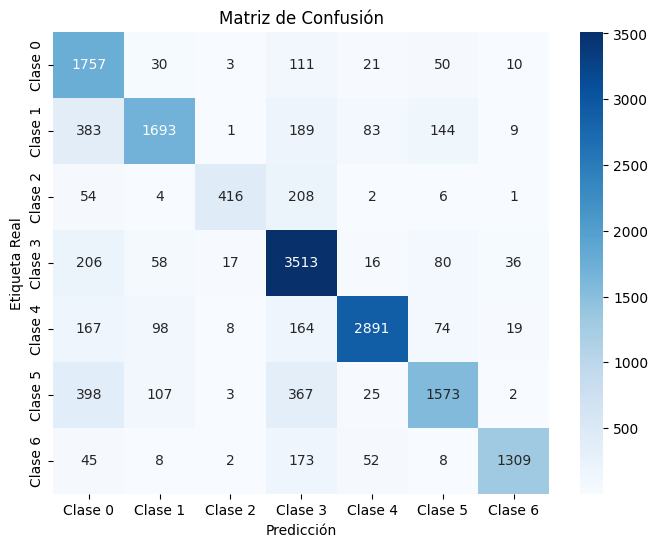

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Etiquetas de las clases
class_names = ['Clase 0', 'Clase 1', 'Clase 2', 'Clase 3', 'Clase 4', 'Clase 5', 'Clase 6']

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
plt.show()

In [30]:
from sklearn.metrics import classification_report

# Generar reporte de clasificación
report = classification_report(y_val, y_pred, target_names=["Clase 0", "Clase 1", "Clase 2", "Clase 3", "Clase 4", "Clase 5", "Clase 6"])
print(report)

              precision    recall  f1-score   support

     Clase 0       0.58      0.89      0.70      1982
     Clase 1       0.85      0.68      0.75      2502
     Clase 2       0.92      0.60      0.73       691
     Clase 3       0.74      0.89      0.81      3926
     Clase 4       0.94      0.85      0.89      3421
     Clase 5       0.81      0.64      0.71      2475
     Clase 6       0.94      0.82      0.88      1597

    accuracy                           0.79     16594
   macro avg       0.83      0.77      0.78     16594
weighted avg       0.82      0.79      0.79     16594



519/519 ━━━━━━━━━━━━━━━━━━━━ 44s 85ms/step


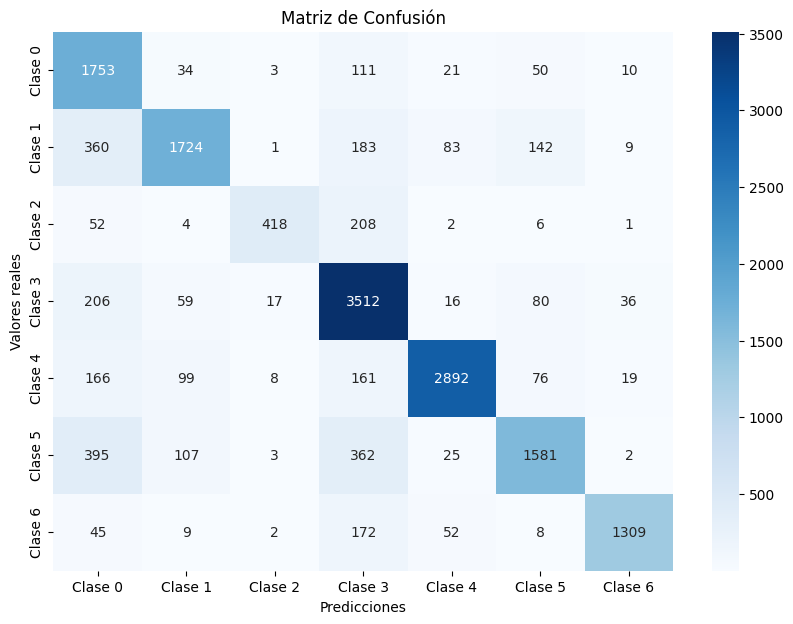

In [49]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Predicciones de probabilidades del modelo (por ejemplo, para las 7 clases)
y_pred_proba = model.predict(X_val)

thresholds = [0.7, 0.4, 0.4, 0.5, 0.45, 0.45, 0.5]  # Define los umbrales para cada clase
y_pred_adjusted = []

for probs in y_pred_proba:
    # Para cada clase, asignar la clase si la probabilidad supera el umbral, o 0 si no
    predicted_class = np.argmax([p if p >= thresholds[i] else 0 for i, p in enumerate(probs)])

    # Si ninguna clase supera su umbral, elige la clase con la mayor probabilidad
    if probs[predicted_class] < thresholds[predicted_class]:
        predicted_class = np.argmax(probs)  # Asignar la clase con mayor probabilidad si no se supera el umbral

    y_pred_adjusted.append(predicted_class)

# Convertir la lista de clases ajustadas en un array para usarla en la matriz de confusión
y_pred_adjusted = np.array(y_pred_adjusted)

# Calcular la matriz de confusión
cm = confusion_matrix(y_val, y_pred_adjusted)

# Mostrar la matriz de confusión
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[f'Clase {i}' for i in range(7)], yticklabels=[f'Clase {i}' for i in range(7)])
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()


In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

# Paso 1: Predicciones originales (sin umbral ajustado)
y_pred_original = np.argmax(model.predict(X_val), axis=1)  # Predicciones usando la clase con la mayor probabilidad

# Métricas antes de ajustar los umbrales
precision_original = precision_score(y_val, y_pred_original, average='weighted')
recall_original = recall_score(y_val, y_pred_original, average='weighted')
f1_original = f1_score(y_val, y_pred_original, average='weighted')
accuracy_original = accuracy_score(y_val, y_pred_original)

print("Métricas antes de ajustar umbrales:")
print(f"Precisión: {precision_original:.4f}")
print(f"Recall: {recall_original:.4f}")
print(f"F1-Score: {f1_original:.4f}")
print(f"Exactitud: {accuracy_original:.4f}")
print("\nReporte de clasificación original:\n", classification_report(y_val, y_pred_original))

# Paso 2: Predicciones ajustadas (con umbrales)
y_pred_adjusted = []

for probs in y_pred_proba:
    # Para cada clase, asignar la clase si la probabilidad supera el umbral, o 0 si no
    predicted_class = np.argmax([p if p >= thresholds[i] else 0 for i, p in enumerate(probs)])

    # Si ninguna clase supera su umbral, elige la clase con la mayor probabilidad
    if probs[predicted_class] < thresholds[predicted_class]:
        predicted_class = np.argmax(probs)  # Asignar la clase con mayor probabilidad si no se supera el umbral

    y_pred_adjusted.append(predicted_class)

# Convertir la lista de clases ajustadas en un array para usarla en la matriz de confusión
y_pred_adjusted = np.array(y_pred_adjusted)

# Métricas después de ajustar los umbrales
precision_adjusted = precision_score(y_val, y_pred_adjusted, average='weighted')
recall_adjusted = recall_score(y_val, y_pred_adjusted, average='weighted')
f1_adjusted = f1_score(y_val, y_pred_adjusted, average='weighted')
accuracy_adjusted = accuracy_score(y_val, y_pred_adjusted)

print("\nMétricas después de ajustar umbrales:")
print(f"Precisión: {precision_adjusted:.4f}")
print(f"Recall: {recall_adjusted:.4f}")
print(f"F1-Score: {f1_adjusted:.4f}")
print(f"Exactitud: {accuracy_adjusted:.4f}")
print("\nReporte de clasificación ajustado:\n", classification_report(y_val, y_pred_adjusted))


519/519 ━━━━━━━━━━━━━━━━━━━━ 45s 87ms/step
Métricas antes de ajustar umbrales:
Precisión: 0.8169
Recall: 0.7926
F1-Score: 0.7940
Exactitud: 0.7926

Reporte de clasificación original:
               precision    recall  f1-score   support

           0       0.58      0.89      0.70      1982
           1       0.85      0.68      0.75      2502
           2       0.92      0.60      0.73       691
           3       0.74      0.89      0.81      3926
           4       0.94      0.85      0.89      3421
           5       0.81      0.64      0.71      2475
           6       0.94      0.82      0.88      1597

    accuracy                           0.79     16594
   macro avg       0.83      0.77      0.78     16594
weighted avg       0.82      0.79      0.79     16594


Métricas después de ajustar umbrales:
Precisión: 0.8181
Recall: 0.7948
F1-Score: 0.7962
Exactitud: 0.7948

Reporte de clasificación ajustado:
               precision    recall  f1-score   support

           0       0

In [51]:
# Guardar el modelo entrenado
model.save('Clasificador_emociones.h5')


In [53]:
from google.colab import files
files.download('Clasificador_emociones.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>